<a href="https://colab.research.google.com/github/100477706/Proyecto2_Aprendizaje/blob/main/Clustering_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

---

**Grupo de Trabajo:** 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

**Enlace Github:** https://github.com/100477706/Proyecto2_Aprendizaje.git

# **1. CARGA DE DATOS**

---

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

sample_data  semillas.csv


In [2]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns

In [4]:
df = pd.read_csv("semillas.csv", sep=",") #subir el archivo de semillas
df.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco,clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Como estamos haciendo un proceso de clustering, es necesario "eliminar" de los datos cargados dicha columna, ya que nosotros estamos buscando etiquetar a la clase a la que pertencen cada uno de los elementos.

In [5]:
# Columna a eliminar para el clustering
delete_cols = ['clase']

# Retiramos la columna con la función drop
df_c = df.drop(columns=delete_cols)

# Definimos la data a utilizar
X = df_c
y = df['clase']

# Mostramos nuevamenete el dataset para verificar que se ha eliminado la columna
df_c.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


# **2. PRINCIPAL COMPONENT ANALYSIS (PCA)**

---

El clustering es una técnica de aprendizaje no supervisado, la cual consiste en organizar un conjunto de datos en grupos, de tal forma que todos los elementos del grupo sean similares entre sí y los datos de grupos diferentes sean lo más distinto posible.

Por ello, primeramente es necesario elegir un escaldor para realizar el proceso de normalización de los datos presentes en el dataset. Sin embargo, los datos pueden tener muchas dimensiones, por lo que hacemos uso de PCA para poder reducir la dimensionalidad a dos dimensiones y poder graficarlos.

Para que podamos reducir efectivamente la dimensionalidad, queremos que pocas componentes, se pueda observar la mayor proporción de varianza posible, ya que representa la mayor cantidad de información o dispersión que tienen los datos.

Para ello, procedemos a visualizar con cada uno de los escaladores, la varianza obtenida y la acumulada mientras aumentamos el número de componentes. Es importante decir que solo gestionaremos PCA con dos componentes como se ha indicado en el enunciado.

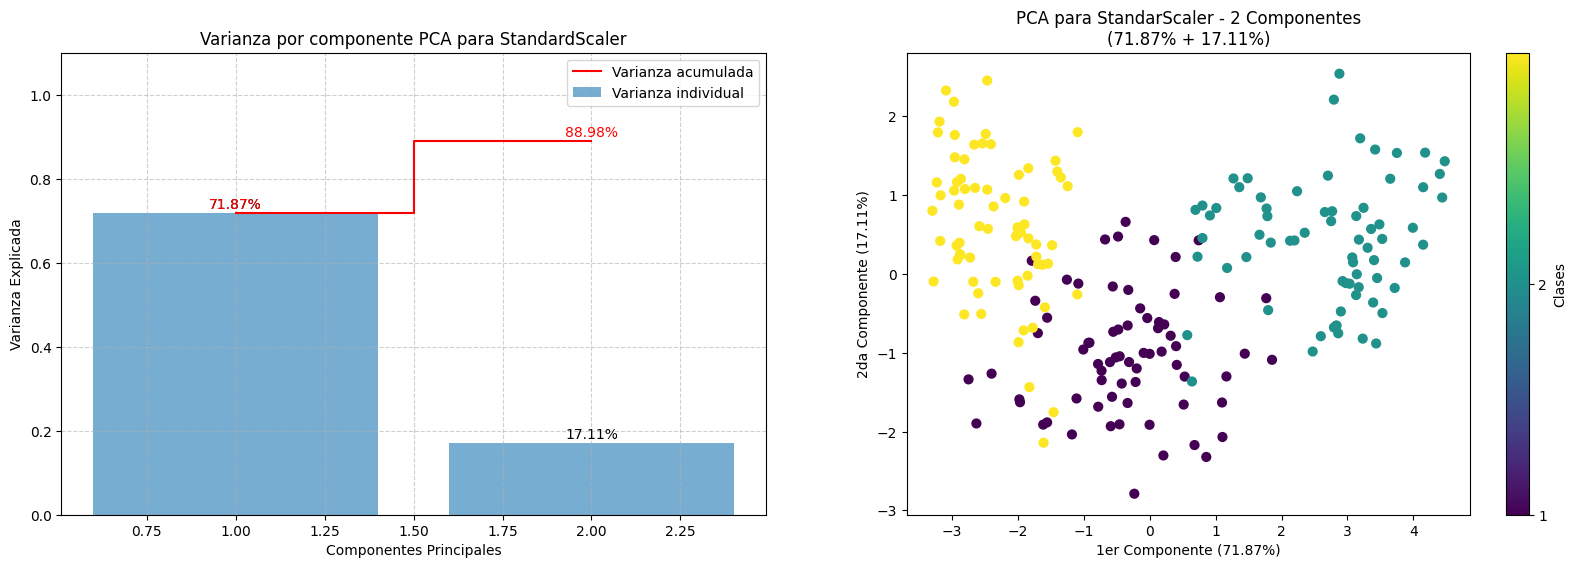

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para StandardScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para StandarScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


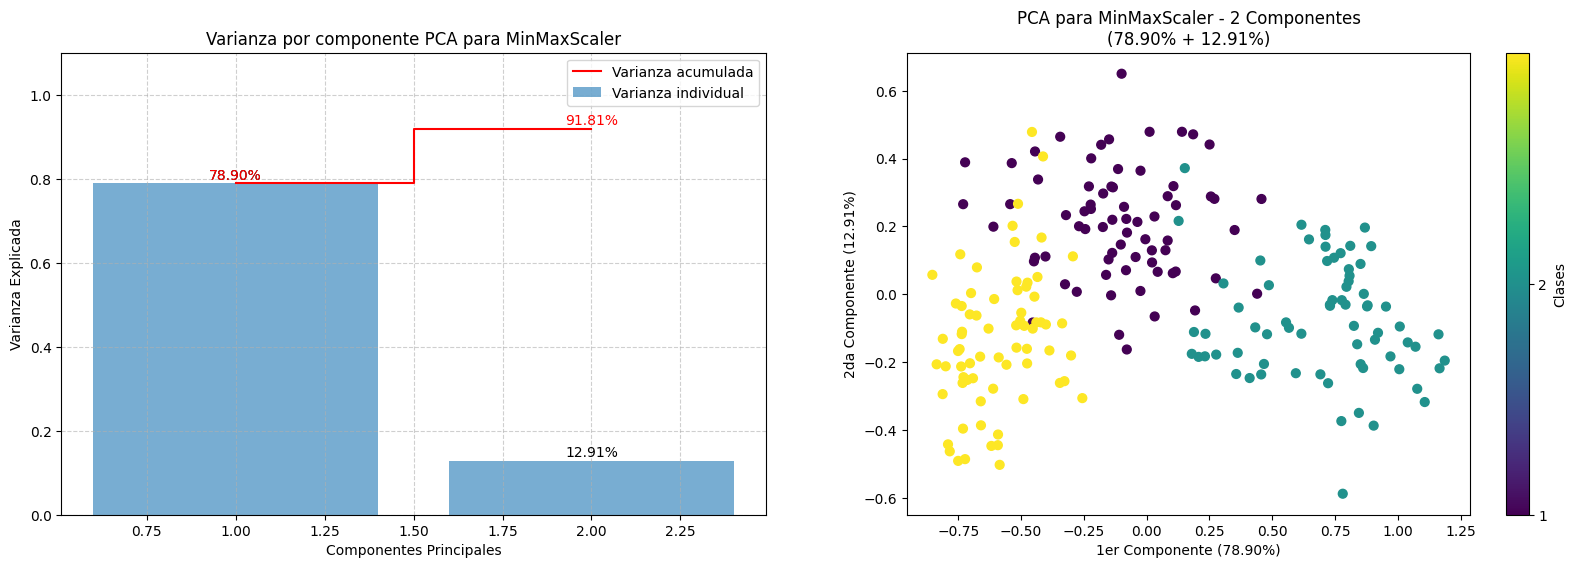

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para MinMaxScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para MinMaxScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


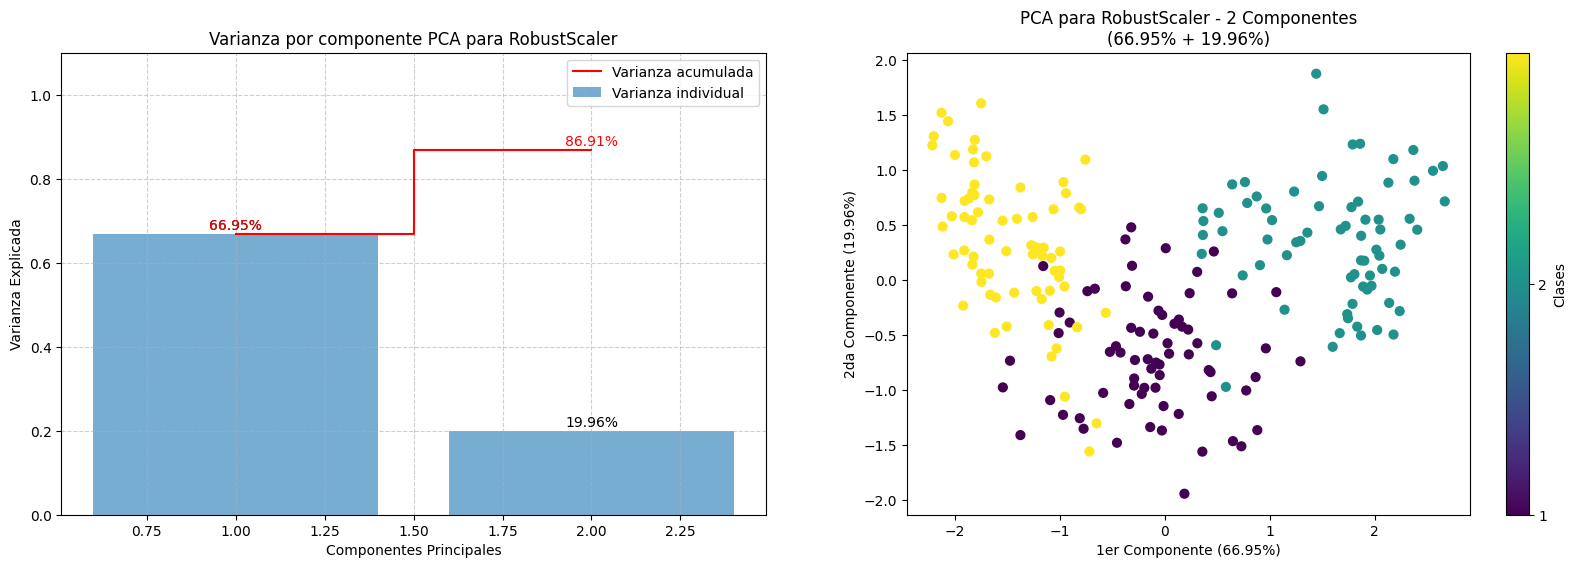

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para RobustScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para RobustScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()

Después de visualizar los resultados obtenidos mediante el uso de PCA, se puede verificar los diferentes valores de varianza y varianza acumulada según el número de componentes que se consideren. Para el caso de nuestro ejercicio, se considera que el número de componenetes a considerar es de 2, lo cual permite visiauizar los resutados en dos dimensiones.

Analizando los resultados anteriores podemos afirmar que aquel escalador con mejor varianza acumulada y el cual utilizaremos para aplicar las técnicas de Clustering es el `MinMaxScaler` con un 91.81%

# **3. TÉCNICAS DE CLUSTERING**

---

Una vez se ha obtenido el mejor método de escalado para nuestro cluster, ahora es necesario establecer la mejor de las técnicas de clustering para determinar agrupaciones significativas en los datos y los cuales permitan establecer a qué clase pertence cada uno.

Para ello, analizaremos y discutiremos los métodos K-Means, DBSCAN y el Clustering Jerarquico con diferentes valores para sus parámetros más importantes, buscando aquel con el que se obtenga un mejor resultado. Por ello, iniciaremos con el algoritmo de K-Means.

## **3.1. K-Means**

---

En este apartado analizaremos y discuteremos los aspectos más importantes del algoritmo de clustering de K-Means y verificaremos que cuál de los resultados es el mejor dados unos parámetros, de tal manera de poder compararlos con los resultados del resto de algoritmos.

### **3.1.1. Modificación de Hiperparámetros**

---

Antes de comenzar con el proceso de comparación de resultados, es necesario conocer los hiperparámetros que tiene el algoritmo, de tal forma de buscar una modificación idónea que permita desvelar un resultado.

- `n_clusters`: determina el número *𝐾* de clusters que se van a generar.
- `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
- `n_init`: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.
- `max_iter`: número máximo de iteraciones permitidas.
- `random_state`: semilla para garantizar la reproducibilidad de los resultados.

Sabiendo esta información y tal como se nos indicado, procederemos a modificar el hiperparámetro correspondiente al número de clusters `n_clusters` a través de los procesos del Método del Codo y el Método de la Silueta, para posteriormente discutir los resultados obtenidos y definir un valor para este hiperparámetro.

####  **3.1.1.a. Método del Codo (Elbow Method)**

---

Para determinar cuál es el número de clusters que se van a generar para permitir conocer cual valor es el mejor valor para el cluster. La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de `.inertia_`), siendo esta una medida de lo coherentes que son internamente los clusters.

La idea es que si K crece, el valor de `.inertia_` es menor porque cada cluster es más pequeño. Sin embargo, a partir de cierto punto, la adición de más clusters proporciona rendimientos decrecientes en términos de reducción de `.inertia_`, y la tasa de disminución se ralentiza, formando un codo en el gráfico. Ese sería el valor óptimo para seleccionar.

Para ello establecemos un rango de valores en el que puede estar `n_clusters` y utilizamos el mejor scaler del apartado anterior y el cual seleccionamos.

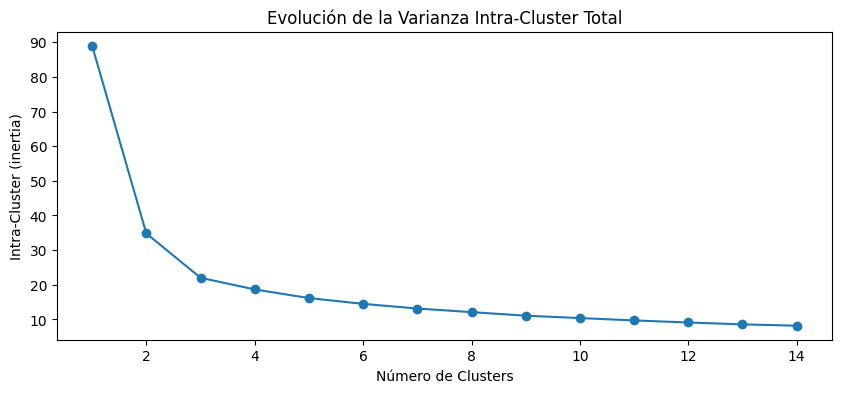

In [ ]:
# Elbow Method
# Rango de clusters a evaluar
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    pipeline.fit(X)
    # Obtener la inercia del modelo KMeans
    inertia = pipeline.named_steps['kmeans'].inertia_
    inertias.append(inertia)

# Graficar la curva del método del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la Varianza Intra-Cluster Total")
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Intra-Cluster (inertia)');

Como se puede observar en la gráfica, el punto en el cual se empieza a ralentizar el decrecimiento de la `.inertia_` es cuando el número de clusters es igual a 3. A partir de dicho punto, el decrecimiento es constante y ralentizado, lo cual indica que el punto de codo o punto óptimo es cuando `n_clusters` es igual a 3 (K=3).

####  **3.1.1.b. Método de la Silueta (Silhouette Method)**

---

A pesar de nosotros observar claramente cuál es el punto óptimo con el método del codo, podemos confirmar nuestra conclusión con el uso del método de la silueta. Este método se utiliza en muchas ocasiones cuando el método del codo no nos otorga un resultado claro del número óptimo de clusters.

Este método utiliza la distancia media intraclúster y la distancia media clúster más cercano para cada muestra, para que cuanto mayor sea el valor de la puntuación, mejor sea la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters, por lo que observaremos que los valores se sitúan entre -1,0 y 1,0.

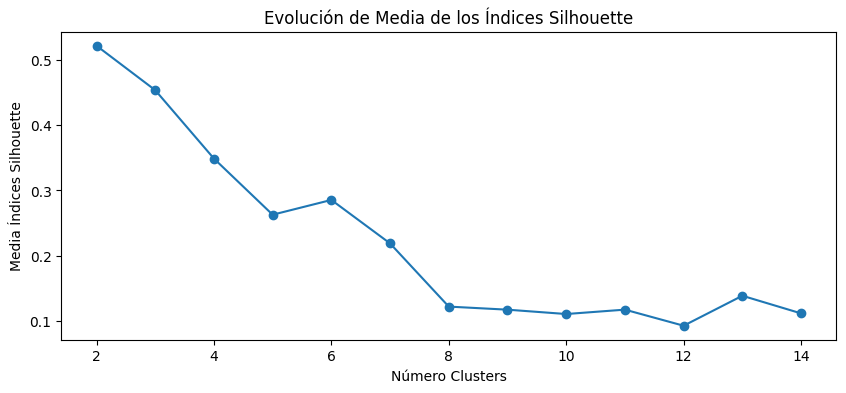

In [ ]:
# Silhouette Method
# Rango de clusters a evaluar
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    # Obtener la inercia del modelo KMeans
    cluster_labels = pipeline.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la curva del método del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de Media de los Índices Silhouette")
ax.set_xlabel('Número Clusters')
ax.set_ylabel('Media Índices Silhouette');

Como se puede observar el mejor número de clusters para este apartado es cuando K=2, ya que es el punto que tiene el valor más alto de la representación gráfica.

####  **3.1.1.c. Conclusión de la Modificación**

Después de realizar las pertinenetes verificaciones con el uso de las dos técnicas antes mencionadas podemos concluir que existe una leve diferencia entre ambos métodos, ya que los resultados son diferentes. Sin embargo, a modo de análisis podemos decir que con un número de 3 clusters, el resultado del método de la silueta es igual de bueno, aunque no es tan óptimo.

Si nosotros afirmamos eso, podemos lograr que ambos resultados se contrasten y por lo tanto eliminar la diferencia de resltados. Esto logra que podamos afirmar que con un número de 3 clusters se puede obtener el mejor resultado que es afirmado por ambos métodos.

### **3.1.2. Resultado Final del K-Means**

---

Una vez concluído el apartado anterior, entonces podemos aplicar el método K-Means teniendo en cuenta que utilizaremos 3 clusters como parámetro para su producción.

Para mostrar el cómo se han distribuido los datos según el número de clusters, utilizaremos un plot en el cual podremos observar la distribución y la ubicación de los centroides en los grupos.

In [ ]:
# Pipeline: escalado + k-means con k=3
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=20, random_state=100477706))
])

# Entrenamiento del modelo
pipeline.fit(X)

# Predicción de etiquetas de cluster
y_predict = pipeline.predict(X)

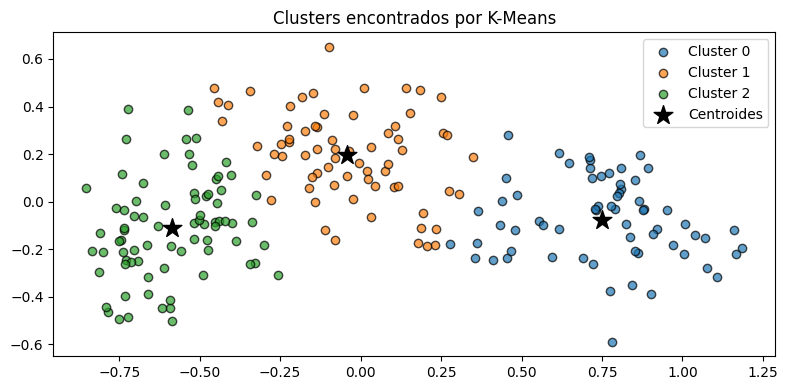

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducimos los datos escalados a 2D con PCA para visualización
X_scaled = pipeline.named_steps['scaler'].transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtenemos etiquetas y centroides
y_predict = pipeline.predict(X)
centroides = pipeline.named_steps['kmeans'].cluster_centers_
centroides_pca = pca.transform(centroides)  # Centroides en espacio PCA

# Gráfico
plt.figure(figsize=(8, 4))
for i in np.unique(y_predict):
    plt.scatter(
        X_pca[y_predict == i, 0],
        X_pca[y_predict == i, 1],
        label=f'Cluster {i}',
        edgecolor='black',
        alpha=0.7
    )

# Centroides
plt.scatter(
    centroides_pca[:, 0],
    centroides_pca[:, 1],
    c='black',
    s=200,
    marker='*',
    label='Centroides'
)

plt.title('Clusters encontrados por K-Means')
plt.legend()
plt.tight_layout()
plt.show()


Podemos ver también el número de aciertos y errores. Podemos verlo como una matriz de confusión. Aquí hay que tener cuidado que Kmeans asigna un cluster cuyo número puede ser distinto. Por lo tanto, cada fila tiene que tener un número alto (aciertos) y en las demás posiciones valores bajos (errores de clasificación)

In [ ]:
# Matriz de confusión: grupos originales vs clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2
grupo_real,,,
1,2,58,10
2,62,8,0
3,0,3,67


## **3.2. Cluster Jerárquico**

---

En este apartado analizaremos y discuteremos los aspectos más importantes del algoritmo de clustering jerárquico y verificaremos que cuál de los resultados es el mejor dados unos parámetros, de tal manera de poder compararlos con los resultados del resto de algoritmos.

### **3.2.1. Modificación de Hiperparámetros**

---

Antes de comenzar con el proceso de comparación de resultados, es necesario conocer los hiperparámetros que tiene el algoritmo, de tal forma de buscar una modificación idónea que permita desvelar un resultado.

- `n_clusters`: determina el número de clusters que se van a generar. En su lugar, su valor puede ser None si se quiere utilizar el criterio `distance_threshold` para crear los clusters o crecer todo el dendograma.
- `distance_threshold`: distancia (altura del dendograma) a partir de la cual se dejan de unir los clusters. Indicar `distance_threshold=0` para crecer todo el árbol.
- `compute_full_tree`: si se calcula la jerarquía completa de clusters. Debe ser `True` si `distance_threshold` es distinto de `None`.
- `affinity`: métrica utilizada como distancia. Puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. Si se utiliza `linkage=“ward”`, solo se permite “euclidean”.
- `linkage: tipo de linkage utilizado. Puede ser “ward”, “complete”, “average” o “single”.

Al aplicar un hierarchical clustering aglomerativo se tiene que escoger una medida de distancia y un tipo de linkage. El concepto de linkage contempla la forma que tenemos de medir la distancia entre pares de grupos. Tenemos varias formas:

- `"ward"`. La elección de los pares de clusters que se fusionan en cada etapa del *agglomerative hierarchical clustering* se fundamenta en el valor óptimo de una función objetivo, la cual puede ser cualquier función determinada por el analista. El método de *Ward's minimum variance* es un ejemplo específico en el cual el propósito es reducir al mínimo la suma total de la varianza intra-cluster. Durante cada fase, se identifican aquellos 2 clusters cuya fusión resulta en el menor aumento de la varianza total intra-cluster. Este indicador es análogo a la métrica que se busca minimizar en el algoritmo K-means.
- `"complete"`. Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora
- `"average"`. Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters.
- `"single"`.Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora.

Teniendo esto en cuenta, entonces procedemos a aplicar las transformaciones pertinenetes para definir el dendograma con el uso de `sklearn.cluster.AgglomerativeClustering`

In [ ]:
scaler = MinMaxScaler()
datos_scaled_np = scaler.fit_transform(X)

# Reconstruir DataFrame
datos_scaled = pd.DataFrame(datos_scaled_np, columns=X.columns, index=X.index)

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Como se indica en las pautas, los datos que se pretenden modificar para el Cluster Jerárquico son los referentes al número de clusters y funciones de linkage, donde se busca la mejor para establecer el modelo.

####  **3.2.1.1. Tipo de Linkage**

---

Para verificar cuál es el tipo de linkage que se debe aplicar para obtener la mejor solución debemos realizar pruebas con todos los tipos existentes utilizando la distancia euclideana como métrica de similitud.

In [ ]:
# Modelos de Linkage
modelo_hclust_complete = AgglomerativeClustering(
    metric = 'euclidean',
    linkage  = 'complete',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_complete.fit(X=datos_scaled)

modelo_hclust_average = AgglomerativeClustering(
    metric = 'euclidean',
    linkage  = 'average',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_average.fit(X=datos_scaled)

modelo_hclust_ward = AgglomerativeClustering(
    linkage  = 'ward',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_ward.fit(X=datos_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

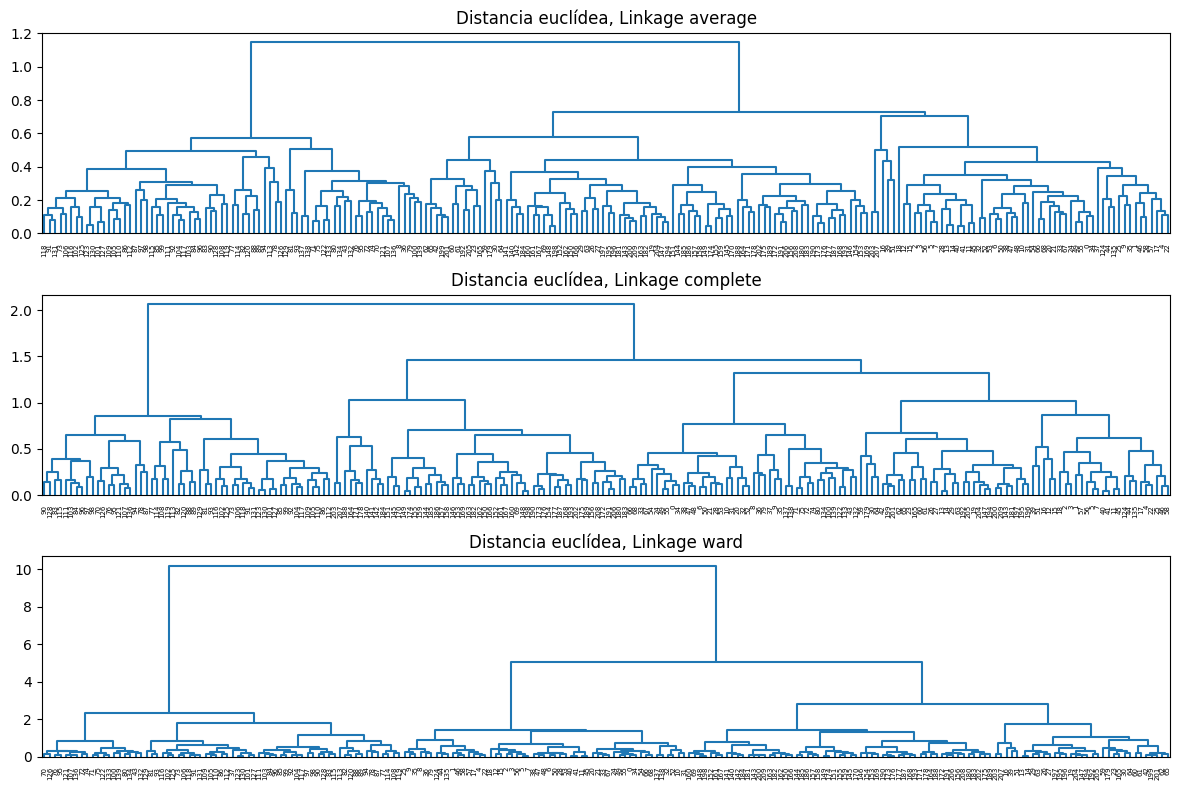

In [ ]:
# Dendrogramas
fig, axs = plt.subplots(3, 1, figsize=(12, 8))
plot_dendrogram(modelo_hclust_average, labels=datos_scaled.index, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, labels=datos_scaled.index, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, labels=datos_scaled.index, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

Nuestros datos se encuentran escalados con `MinMaxScaler`, nosotros buscamos formar clusters lo más compactos y homogéneos posibles, maximizando la cohesión interna y la separación entre grupos. Por esa razón, hemos decidido usar para este apartado el tipo `linkage ward`, ya que este se encarga de minimizar la varianza dentro de los clusters en cada paso de función, lo que genera homogeinidad en los grupos.

####  **3.2.1.2. Número de Clusters**

---

Otro de los parámetros a modificar se corresponde a conocer a cuál es el número de clusters ideal para mejorar el resultado. Para este caso existen varias formas de verificar este hiperparámetro y su efecto al modificarse.

Una forma de decidir el número de clusters, puede ser inspeccionando el dendograma y elegir la altura a la que se corta para generar los clusters. En nuestro caso y teniendo en consideración las conclusiones del apartado anterior, vamos a utilizar como tipo de linkage el ward y vamos a definir a ojo que la altura del corte debe ser 4.

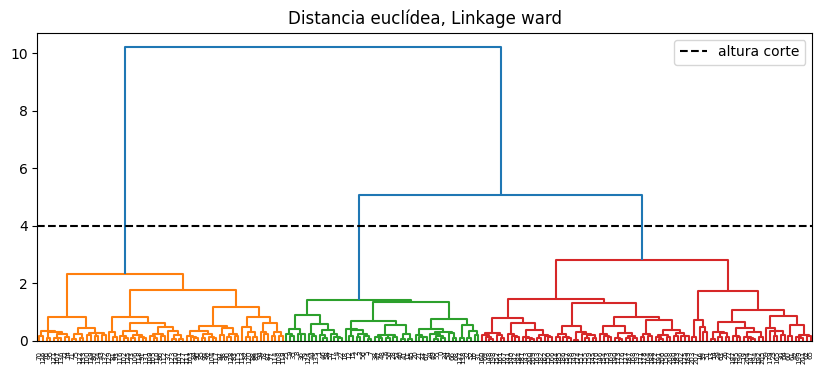

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
altura_corte = 4
plot_dendrogram(modelo_hclust_ward, labels=datos_scaled.index, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

Como podemos observar, se generan 3 grupos bien marcados al colocar como altura límite el valor de 4, lo cual generaría tres clusters. Lo mismo ocurre en el caso de colocar como altura el 3. En el caso de disminuir la altura a 2 podremos conseguir 5 clusters y si disminuímos a 1 la altura conseguiremos 13 clusters.

Dados los resultados, parece ideal elegir una altura de 3 o de 4 para conseguir un total de tres clusters.

Por otro lado, tenemos el uso de los índices silhouette el cual consiste en utilizar la distancia media intraclúster y la distancia media clúster más cercano para cada muestra, para que cuanto mayor sea el valor de la puntuación, mejor sea la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters, por lo que observaremos que los valores se sitúan entre -1,0 y 1,0.

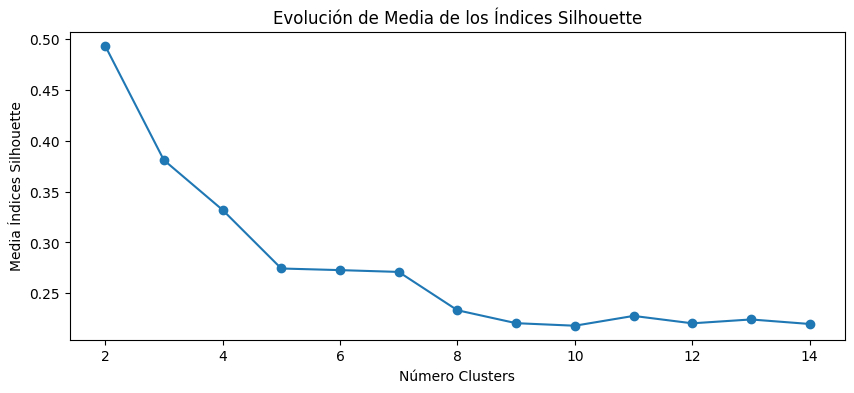

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        metric   = 'euclidean',
        linkage    = 'ward',
        n_clusters = n_clusters
    )

    # Use datos_scaled instead of X_scaled
    cluster_labels = modelo.fit_predict(datos_scaled)
    silhouette_avg = silhouette_score(datos_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de Media de los Índices Silhouette")
ax.set_xlabel('Número Clusters')
ax.set_ylabel('Media Índices Silhouette');

Como se puede ver en este caso, se establece que el número de clusters ideal es de 2, aunque también se pudiera establecer que el 3 clusters sigue siendo bueno para el modelo.

Otra manera de elegir el número de clusters consiste en determinar la situación donde se produce un salto grande entre alturas. Si se produce un salto grande quiere decir que hace falta una distancia demasiado grande para fusionar los clusters. Por tanto, puede ser preferible parar de fusionar clusters antes de esa altura.

Número óptimo de clusters: 2
Altura de fusión óptima: 1.46


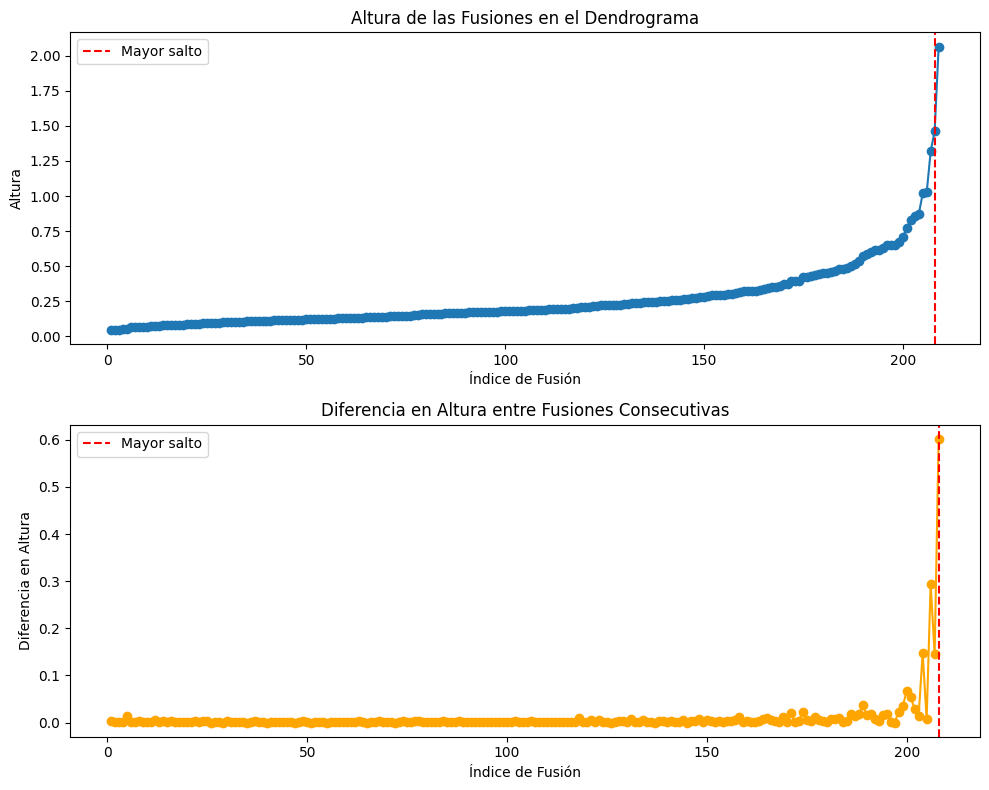

In [ ]:
# Calculamos la matriz de enlace con linkage 'complete'
Z = sch.linkage(datos_scaled, method='complete')

# Extraemos las alturas de fusión
heights = Z[:, 2]  # La tercera columna contiene las alturas de fusión

# Calculamos las diferencias entre alturas consecutivas
diffs = np.diff(heights)

# Índice donde ocurre el mayor salto en altura
idx_max_jump = np.argmax(diffs)

# Número óptimo de clusters basado en el mayor salto
n_clusters_optimo = len(heights) - idx_max_jump

# Altura de fusión en el mayor salto
altura_optima = heights[idx_max_jump]

print(f"Número óptimo de clusters: {n_clusters_optimo}")
print(f"Altura de fusión óptima: {altura_optima:.2f}")

# Ahora ploteamos la información

# Graficamos la altura de fusión y su incremento
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de las alturas de fusión
ax[0].plot(range(1, len(heights) + 1), heights, marker='o', linestyle='-')
ax[0].set_title("Altura de las Fusiones en el Dendrograma")
ax[0].set_xlabel("Índice de Fusión")
ax[0].set_ylabel("Altura")
ax[0].axvline(x=idx_max_jump + 1, color='r', linestyle='--', label="Mayor salto")
ax[0].legend()

# Gráfico del incremento en altura
ax[1].plot(range(1, len(diffs) + 1), diffs, marker='o', linestyle='-', color='orange')
ax[1].set_title("Diferencia en Altura entre Fusiones Consecutivas")
ax[1].set_xlabel("Índice de Fusión")
ax[1].set_ylabel("Diferencia en Altura")
ax[1].axvline(x=idx_max_jump + 1, color='r', linestyle='--', label="Mayor salto")
ax[1].legend()

plt.tight_layout()
plt.show()

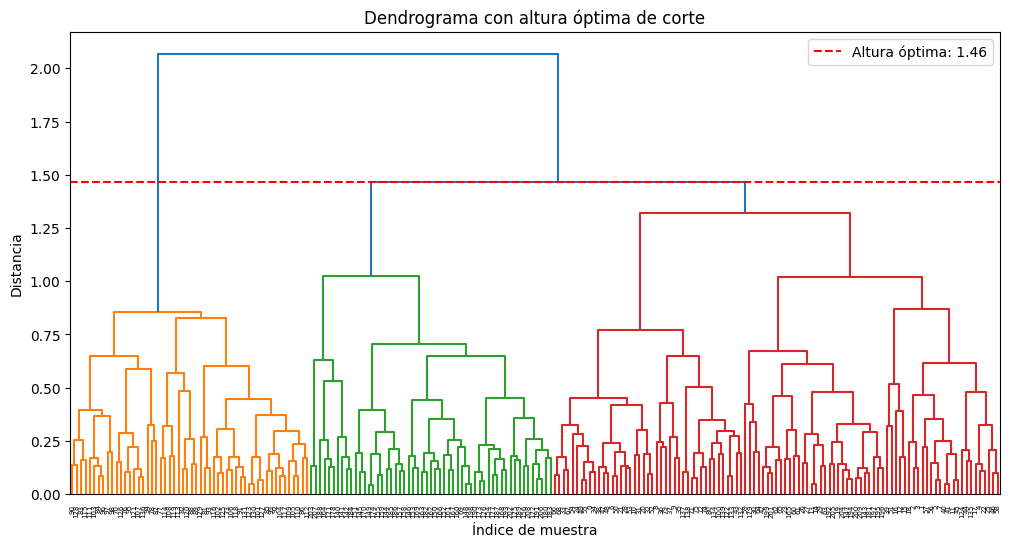

In [ ]:
# Graficamos el dendrograma
plt.figure(figsize=(12, 6))
sch.dendrogram(Z, color_threshold=altura_optima)  # Coloriza los clusters a esa altura
plt.axhline(y=altura_optima, color='r', linestyle='dashed', label=f'Altura óptima: {altura_optima:.2f}')
plt.title("Dendrograma con altura óptima de corte")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia")
plt.legend()
plt.show()

Dados los resultados obtenidos en este apartado, se puede verificar que se obtienen tres clusters si se respeta la altura máxima establecida. Si además se compara con nuestra primera hipótesis planteada en este apartado, se puede verificar que se contrasta, al igual que en cierta medida con la del segundo. Por ello, se decide que el número de clusters debe ser igual a 3.

### **3.2.2. Modelo Final del Cluster Jerárquico**

---

Una vez concluído el apartado anterior, entonces podemos aplicar el método de Cluster Jerárquico teniendo en cuenta que utilizaremos 3 clusters y ward como tipo de linkage como parámetros para su producción.

Para mostrar el cómo se han distribuido los datos según el número de clusters, utilizaremos un plot en el cual podremos observar la distribución.

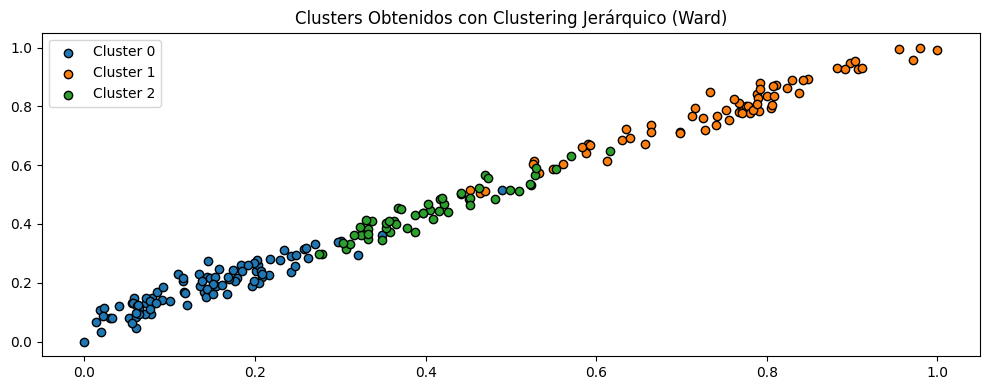

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Fit the scaler to your data
pipeline.fit(X)

# Obtener los datos escalados desde el pipeline
X_scaled = pipeline.named_steps['scaler'].transform(X)

# Definir y ajustar el modelo jerárquico final
modelo_final_hclust = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

# Predecir las etiquetas de cluster
labels_hclust = modelo_final_hclust.fit_predict(X_scaled)

# Visualizar los clusters resultantes
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i in np.unique(labels_hclust):
    ax.scatter(
        X_scaled[labels_hclust == i, 0],
        X_scaled[labels_hclust == i, 1],
        label=f'Cluster {i}',
        edgecolor='black'
    )

ax.set_title("Clusters Obtenidos con Clustering Jerárquico (Ward)")
ax.legend()
plt.tight_layout()
plt.show()


## **3.3. DBSCAN: Density-based Spatial Clustering of Applications with Noise**

---

En este apartado analizaremos y discuteremos los aspectos más importantes del algoritmo de DBSCAN y verificaremos que cuál de los resultados es el mejor dados unos parámetros, de tal manera de poder compararlos con los resultados del resto de algoritmos.

### **3.3.1. Modificación de Hiperparámetros**

---

Antes de comenzar con el proceso de comparación de resultados, es necesario conocer los hiperparámetros que tiene el algoritmo, de tal forma de buscar una modificación idónea que permita desvelar un resultado.

- `eps`: Distancia máxima entre dos muestras para que una se considere vecina de la otra. Define el *𝜖-neighborhood*
- `min_samples`: El número de muestras (o peso total) en un vecindario para que un punto se considere un *core point*. Esto incluye el propio punto. Si `min_samples` se establece en un valor más alto, DBSCAN encontrará conglomerados más densos, mientras que si se establece en un valor más bajo, los conglomerados encontrados serán más dispersos.
- `metric`: métrica utilizada como distancia. Puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. Por defecto es “euclidean”.

Para poder realizar entonces la modificación de hiperparámetros, utilizaremos la clase `sklearn.cluster.DBSCAN` de Scikit-Learn, con la que se pueden entrenar modelos de clustering utilizando el algoritmo DBSCAN. Con ello observaremos la situación inicial que tenemos y cómo modificar los hiperparámetros para mejorar el resultado.

Para realizar este proceso, entonces es necesario caragar los datos que tenemos en DBSCAN.

Una vez observado el comportamiento del código DBSCAN, entonces es nuestra labor modificar los hiperparámetros como eps o como el mínimo número de muestras con tal de hallar un resultado óptimo.

####  **3.2.1.1. EPS**

---

Mediante el ajuste de este valor nosotros buscamos definir la distancia máxima entre dos puntos para que sean considerados vecinos. La idea es que con el valor de `min_samples` se puedan definir cuáles son los núcleos de los cluters, teniendo en cuenta que un núcleo se difinirá cuando haya un número igual o mayor de `min_samples` que se encuentren dentro del ratio establecido.

Para ello, vamos a realizar una gráfica que define la distancia que debe tener los vecinos con respecto a los puntos y vamos a marcar el punto donde se pueda visualizar un aumento exponencial de la distancia con respecto a los puntos (Punto de Codo).

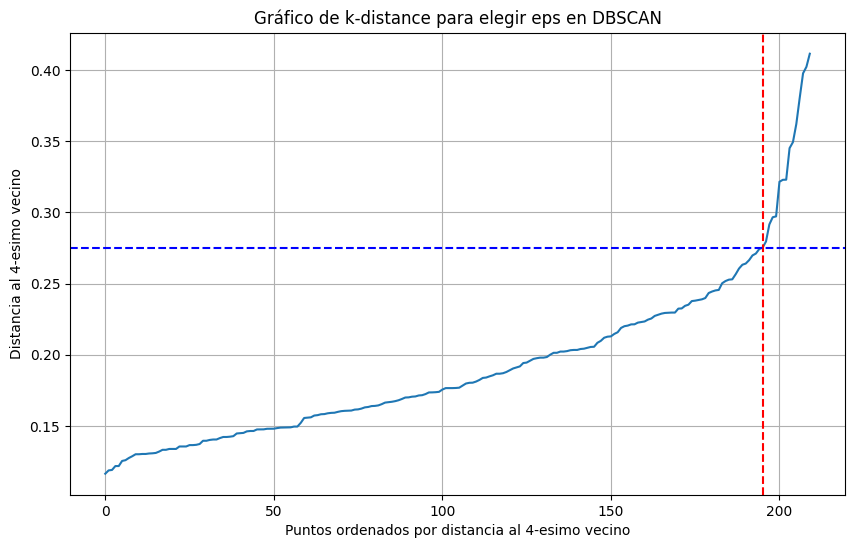

x_point=195 y_value=0.27525997698239585


In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Definimos el número de muestras
min_samples = 5

# Computamos los vecinos cercanos
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Sorteamos las dsitancias
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

x_point = 195
y_value = sorted_distances[x_point]  # Obtener el valor de la distancia para ese punto

# Establecemos la Gráfica
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel('Puntos ordenados por distancia al {}-esimo vecino'.format(min_samples-1))
plt.ylabel('Distancia al {}-esimo vecino'.format(min_samples-1))
plt.title('Gráfico de k-distance para elegir eps en DBSCAN')

plt.axvline(x=x_point, color='r', linestyle='--')

# Dibujar la línea horizontal correspondiente en el eje Y
plt.axhline(y=y_value, color='b', linestyle='--')

plt.grid(True)
plt.show()

print(f'{x_point=} y_value={y_value}')

Como se puede observar, tenemos que con un valor de 5 vecinos mínimos, el resultado es que la eps tiene un valor de 0.275. Sin embargo, es necesario verificar con otros min_samples para ver sus eps también.

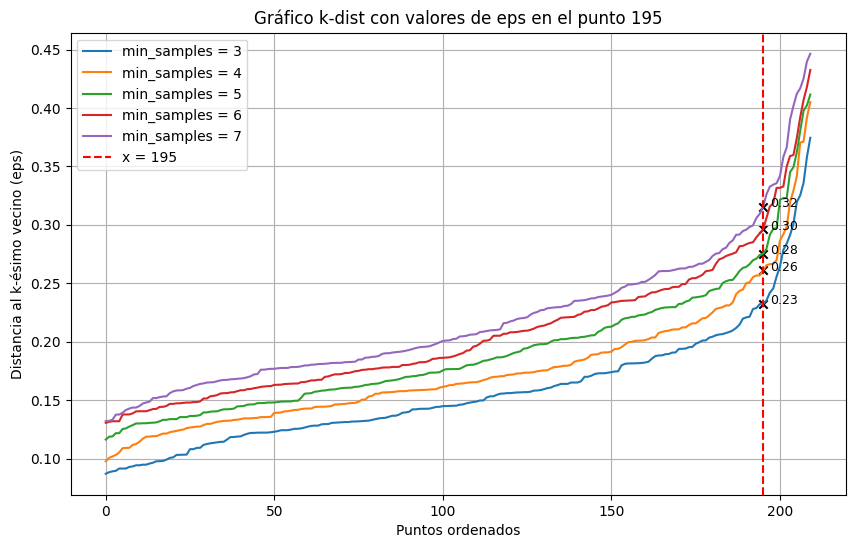

In [9]:
x_point = 195  # Punto a marcar

plt.figure(figsize=(10, 6))

for min_samples in [3, 4, 5, 6, 7]:
    nn = NearestNeighbors(n_neighbors=min_samples)
    nn.fit(X_scaled)
    distances, _ = nn.kneighbors(X_scaled)
    sorted_distances = np.sort(distances[:, min_samples - 1])

    # Valor de eps en ese punto
    y_value = sorted_distances[x_point]

    # Graficar la curva k-dist
    plt.plot(sorted_distances, label=f'min_samples = {min_samples}')

    # Marcar punto 195 con una cruz
    plt.scatter(x_point, y_value, color='black', marker='x')
    plt.text(x_point + 2, y_value, f"{y_value:.2f}", fontsize=9)

# Añadir líneas guías generales (solo una vez)
plt.axvline(x=x_point, color='r', linestyle='--', label='x = 195')
plt.title('Gráfico k-dist con valores de eps en el punto 195')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al k-ésimo vecino (eps)')
plt.grid(True)
plt.legend()
plt.show()


Como se puede observar en este gráfico, teniendo en consideración un número mínimo de vecinos que va desde el 3 hasta el 7, podemos afirmar que la eps varía en 0.1 aproximadamente, emepezando en la 0.23 y terminando en la 0.32.

Entonces para establecer un valor de eps, vamos a tener que construir el DBSCAN con distintos número de vecinos mínimos.

####  **3.2.1.2. Número Mínimo de Vecinos (Min_Samples)**

---

Para lograr establecer la mejor opción del DBSCAN, es necesario establecer el número mínimo de vecinos que permita dar el mejor eps para el resultado. Por ello, dados los resultados anteriores, vamos verificar cuál es el mejor eps que permita establecer dicho valor.

Como pudimos observar en la anterior gráfica anterior, podemos ver que los valores de número mínimo dan resultados similares, decidimos que para este apartado es más idóneo utilizar un min_sample de 5.

####  **3.2.1.3. Modelo Final de DBSCAN**

---

Una vez establecido el número mínimo de vecinos y el eps para dicho número, entonces procedemos a plantear la mejor solución para el DBSCAN, utilizando la eps de 0.275 y un número mínimo de 5 vecinos.

Para mostrar el cómo se han distribuido los datos según el número de clusters, utilizaremos un plot en el cual podremos observar la distribución.

Número de clusters encontrados: 1
Número de outliers encontrados: 6


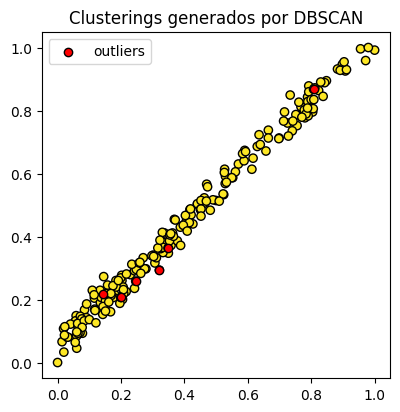

In [13]:
# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
    eps          = 0.275,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan.fit(X=X_scaled)

# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X_scaled[:, 0],
    y = X_scaled[:, 1],
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X_scaled[labels == -1, 0],
    y = X_scaled[labels == -1, 1],
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN')

# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

## **4. Análisis de Modelos**

---